# Legal Recomendations

The dataset contains a total of 25000 legal cases in the form of text documents. Each document has been annotated with catchphrases, citations sentences, citation catchphrases, and citation classes. Citation classes indicate the type of treatment given to the cases cited by the present case.

#### About this file
The Legal Citation Text Classification dataset is provided in CSV format. The dataset has four columns, namely Case ID, Case Outcome, Case Title, and Case Text. The Case ID column contains a unique identifier for each legal case, the Case Outcome column indicates the outcome of the case, the Case Title column contains the title of the legal case, and the Case Text column contains the text of the legal case.




## Exploración de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../../legal_text_classification.csv')

In [7]:
df.head()

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...


In [9]:
df.dtypes

case_id         object
case_outcome    object
case_title      object
case_text       object
dtype: object

In [11]:
df.describe()

,case_id,case_outcome,case_title,case_text
count,24985,24985,24985,24809
unique,24985,10,18581,17920
top,Case1,cited,Minister for Immigration and Ethnic Affairs v ...,submitted that this Court should hold that the...
freq,1,12219,70,42


In [12]:
df.isna().sum()

case_id           0
case_outcome      0
case_title        0
case_text       176
dtype: int64

In [13]:
df.shape

(24985, 4)

In [16]:
df.case_outcome.unique()

array(['cited', 'applied', 'followed', 'referred to', 'related',
       'considered', 'discussed', 'distinguished', 'affirmed', 'approved'],
      dtype=object)

In [21]:
conteo_categorias = df.case_outcome.value_counts()

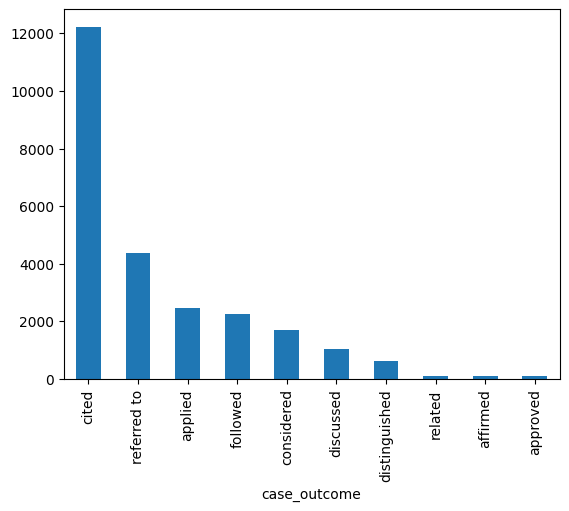

In [25]:
conteo_categorias.plot.bar()
plt.show()

In [23]:
df.dropna(inplace=True)

In [24]:
df.isna().sum()

case_id         0
case_outcome    0
case_title      0
case_text       0
dtype: int64

## Manipulación de datos

In [27]:
df.case_outcome.unique()

array(['cited', 'applied', 'followed', 'referred to', 'related',
       'considered', 'discussed', 'distinguished', 'affirmed', 'approved'],
      dtype=object)

In [29]:
map_outcome = {
    'cited' : 1,
    'referred to' : 2,
    'applied' : 3,
    'followed' : 4,
    'considered' : 5,
    'discussed' : 6,
    'distinguished' : 7,
    'related' : 8,
    'affirmed' : 9,
    'approved' : 10
}

In [30]:
df['outcome_encoded'] = df.case_outcome.map(map_outcome)

In [31]:
df.head()

,case_id,case_outcome,case_title,case_text,outcome_encoded
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,1
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,1
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,1
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,1
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,1


In [32]:
df['complete_text'] = df['case_title'].str.cat(df['case_text'], sep=' ', na_rep='')

In [33]:
df.head()

,case_id,case_outcome,case_title,case_text,outcome_encoded,complete_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,Ordinarily that discretion will be exercised s...,1,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,The general principles governing the exercise ...,1,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,Ordinarily that discretion will be exercised s...,1,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,The general principles governing the exercise ...,1,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,The preceding general principles inform the ex...,1,Dr Martens Australia Pty Ltd v Figgins Holding...


In [35]:
df.complete_text[0]

'Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Ltd (No 2) [2002] FCA 224 ; (2002) 190 ALR 121 Ordinarily that discretion will be exercised so that costs follow the event and are awarded on a party and party basis. A departure from normal practice to award indemnity costs requires some special or unusual feature in the case: Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Ltd (No 2) [2002] FCA 224 ; (2002) 190 ALR 121 at [11] (Weinberg J) citing Colgate Palmolive Co v Cussons Pty Ltd (1993) 46 FCR 225 at 233 (Sheppard J).'

In [36]:
import re
import string

def clean_text(text: str) -> str:
    """
    Función de limpieza de texto que combina la robustez web con la eliminación
    de ruido específico de documentos legales (citas, números de caso).
    """
    # 1. Convertir a minúsculas
    text = str(text).lower()

    # 2. Eliminar texto entre corchetes (etiquetas tipo [duplicate] o referencias legales)
    text = re.sub(r'\[.*?\]', '', text)

    # 3. Eliminar URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)

    # 4. Eliminar etiquetas HTML
    text = re.sub(r'<.*?>+', '', text)

    # 5. ELIMINAR RUIDO LEGAL Y NUMÉRICO:
    #    - Elimina números (años, volúmenes, páginas)
    #    - Elimina paréntesis y punto y coma (estructuras típicas de cita)
    text = re.sub(r'[0-9]+|;|\(|\)', '', text)

    # 6. Eliminar puntuación, pero conservar signos útiles (ej: '?')
    punctuation = string.punctuation.replace('?', '')
    text = re.sub(r'[%s]' % re.escape(punctuation), '', text)

    # 7. Eliminar saltos de línea y tabulaciones
    text = re.sub(r'\n|\t', ' ', text)

    # 8. Eliminar caracteres no ASCII (emojis, símbolos raros)
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    # 9. Eliminar espacios extra y recortar
    text = re.sub(r'\s+', ' ', text).strip()

    return text

### Lemmatization

In [37]:
import nltk
from nltk.corpus import stopwords

In [38]:
#nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [39]:
import spacy
# !python -m spacy download en_core_web_sm
nlp_en = spacy.load('en_core_web_sm')

In [40]:
def clean_lemmatized_delete_stopwords(txt : str) -> str:
    clean_data = clean_text(txt)
    doc_en = nlp_en(clean_data)
    lemmatized = [token.lemma_ for token in doc_en if token.text.lower() not in stop_words]
    return ' '.join(lemmatized).strip()

In [41]:
df['clean_text'] = df.complete_text.apply(clean_lemmatized_delete_stopwords)

In [42]:
df.to_csv('limpio.csv')

In [8]:
df = pd.read_csv('limpio.csv')

## Train test split

In [6]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.complete_text
y = df.outcome_encoded

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [49]:
X_train.shape

(18606,)

## TFI-DF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
import joblib

In [51]:
tfi_vec = TfidfVectorizer(ngram_range=(1,2), max_features=3000)
tfi_train = tfi_vec.fit_transform(X_train)
tfi_test = tfi_vec.transform(X_test)
joblib.dump(tfi_vec, 'vectorizer.pkl')

['vectorizer.pkl']

In [4]:
tfi_vec = joblib.load('vectorizer.pkl')

In [11]:
tfi_train = tfi_vec.transform(X_train)
tfi_test = tfi_vec.transform(X_test)

## Prueba de varios modelos

In [5]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [53]:
models = {
    'LogisticRegression' : LogisticRegression(solver='liblinear', random_state=42, max_iter=1000),
    'MultinomialNB' : MultinomialNB(),
    'LinearSVC' : LinearSVC(random_state=42, max_iter=1000),
    'SGDClassifier' : SGDClassifier(loss='log_loss', random_state=42, max_iter=1000)
}

model_results = {}

In [56]:
def train_and_evaluate(classifier, X_train, y_train, X_test, y_test):
    print(f"  > Entrenando {classifier.__class__.__name__}...")

    #Entrenamiento
    classifier.fit(X_train, y_train)

    #predicciones
    y_pred = classifier.predict(X_test)

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted', zero_division=0),
        "Recall": recall_score(y_test, y_pred, average='weighted', zero_division=0),
        "F1_Score": f1_score(y_test, y_pred, average='weighted', zero_division=0),
    }

    return metrics, classifier

In [57]:
best_f1_score = -1
best_model = None
best_model_name = ""

print("================ INICIANDO COMPARACIÓN ================")

for name, model in models.items():
    print(f"\nProcesando modelo: {name}")
    
    # Entrenar y evaluar
    metrics, trained_model = train_and_evaluate(model, tfi_train, y_train, tfi_test, y_test)
    
    # Almacenar resultados
    model_results[name] = metrics
    
    # Identificar el mejor modelo
    if metrics["F1_Score"] > best_f1_score:
        best_f1_score = metrics["F1_Score"]
        best_model = trained_model
        best_model_name = name

print("\n================ COMPARACIÓN FINALIZADA ================")

# =================================================================
# 4. VISUALIZACIÓN Y GUARDADO
# =================================================================

# Crear DataFrame para visualización
results_df = pd.DataFrame(model_results).T

print("\n" + "="*80)
print("             TABLA DE RENDIMIENTO DE CLASIFICADORES")
print("="*80)
# Mostrar la tabla, ordenada por F1-Score (el mejor primero)
print(results_df.sort_values(by='F1_Score', ascending=False).round(4))
print("="*80)

# Guardar el mejor modelo
if best_model:
    file_name = f'models/{best_model_name.lower()}_nlp_model.pkl'
    # joblib.dump(best_model, file_name)
    print(f"\n🏆 EL MEJOR MODELO (basado en F1-Score) es: {best_model_name}")
    print(f"✔️ El mejor modelo NO FUE GUARDADO, DESCOMENTA la línea joblib.dump si deseas guardarlo en: {file_name}")

# Limpiar las variables si es necesario para liberar memoria (en notebooks grandes)
del models, model_results

================ INICIANDO COMPARACIÓN ================

Procesando modelo: LogisticRegression
  > Entrenando LogisticRegression...


/home/mateo/miniconda3/envs/py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(



Procesando modelo: MultinomialNB
  > Entrenando MultinomialNB...

Procesando modelo: LinearSVC
  > Entrenando LinearSVC...

Procesando modelo: SGDClassifier
  > Entrenando SGDClassifier...

================ COMPARACIÓN FINALIZADA ================

             TABLA DE RENDIMIENTO DE CLASIFICADORES
                    Accuracy  Precision  Recall  F1_Score
LinearSVC             0.5188     0.4726  0.5188    0.4738
LogisticRegression    0.5117     0.4660  0.5117    0.4073
SGDClassifier         0.5035     0.4428  0.5035    0.3757
MultinomialNB         0.4885     0.4420  0.4885    0.3293

🏆 EL MEJOR MODELO (basado en F1-Score) es: LinearSVC
✔️ El mejor modelo NO FUE GUARDADO, DESCOMENTA la línea joblib.dump si deseas guardarlo en: models/linearsvc_nlp_model.pkl


## Busqueda de mejores hiperparámetros

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
svc_model = LinearSVC(random_state=42)

param_grid = {
    # 'C' es el hiperparámetro de regularización. Probamos un rango logarítmico.
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    
    # 'loss' define la función de pérdida. 'squared_hinge' es el estándar.
    'loss': ['hinge', 'squared_hinge'],
    
    # 'penalty' (regularización). 'l2' es el más común.
    'penalty': ['l2'],
    
    # 'dual' debe ser False para matrices dispersas (TF-IDF) y n_samples > n_features.
    # Si n_samples (filas) es menor que n_features (columnas), usa True. 
    # Aquí asumimos False para eficiencia en TF-IDF.
    'dual': [False], 
}

In [14]:
from sklearn.metrics import make_scorer

In [15]:
f1_scorer = make_scorer(f1_score, average='weighted', zero_division=0)


In [16]:
grid_search = GridSearchCV(
    estimator=svc_model,
    param_grid=param_grid,
    scoring=f1_scorer,
    cv=5,
    verbose=3,
    n_jobs=4
)

In [17]:
grid_search.fit(tfi_train, y_train)

print("\n================ RESULTADOS DE LA OPTIMIZACIÓN ================")
print(f"Mejor F1-Score de Validación Cruzada: {grid_search.best_score_:.4f}")
print("Mejores Hiperparámetros encontrados:")
print(grid_search.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 3/5] END C=0.001, dual=False, loss=hinge, penalty=l2;, score=nan total time=   0.1s
[CV 1/5] END C=0.001, dual=False, loss=hinge, penalty=l2;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, dual=False, loss=hinge, penalty=l2;, score=nan total time=   0.0s
[CV 5/5] END C=0.001, dual=False, loss=hinge, penalty=l2;, score=nan total time=   0.0s
[CV 4/5] END C=0.001, dual=False, loss=hinge, penalty=l2;, score=nan total time=   0.1s
[CV 1/5] END C=0.001, dual=False, loss=squared_hinge, penalty=l2;, score=0.320 total time=   3.9s
[CV 4/5] END C=0.001, dual=False, loss=squared_hinge, penalty=l2;, score=0.320 total time=   3.7s
[CV 2/5] END C=0.001, dual=False, loss=squared_hinge, penalty=l2;, score=0.320 total time=   3.9s
[CV 1/5] END C=0.01, dual=False, loss=hinge, penalty=l2;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, dual=False, loss=hinge, penalty=l2;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, dual=False

/home/mateo/miniconda3/envs/py3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/home/mateo/miniconda3/envs/py3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/mateo/miniconda3/envs/py3.10/lib/python3.10/site-packages/sklearn/base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/home/mateo/miniconda3/envs/py3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py", line 321


================ RESULTADOS DE LA OPTIMIZACIÓN ================
Mejor F1-Score de Validación Cruzada: 0.4827
Mejores Hiperparámetros encontrados:
{'C': 10, 'dual': False, 'loss': 'squared_hinge', 'penalty': 'l2'}


In [18]:
best_svc = grid_search.best_estimator_
joblib.dump(best_svc, 'linear_svc_optimized_model.pkl')

['linear_svc_optimized_model.pkl']

In [19]:
from sklearn.metrics import classification_report

In [21]:
y_pred = best_svc.predict(tfi_test)

In [22]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           1       0.62      0.73      0.67      3028
           2       0.44      0.40      0.42      1091
           3       0.26      0.19      0.22       610
           4       0.31      0.25      0.27       563
           5       0.24      0.18      0.20       425
           6       0.25      0.22      0.23       254
           7       0.31      0.27      0.29       151
           8       0.77      0.36      0.49        28
           9       0.52      0.42      0.47        26
          10       0.20      0.07      0.11        27

    accuracy                           0.50      6203
   macro avg       0.39      0.31      0.34      6203
weighted avg       0.47      0.50      0.48      6203

